In [42]:
import os
import numpy as np
import networkx as nx

import process
import pandas

# Chip analysis

The following notebook is an analysis notebook. It has been conceived to order and analyse a dump of confocal images. All questions concerning the code should be emailed to gustave.ronteix@pasteur.fr.

These cells are to be used as fitting parameters for the cell

In [72]:
path = r'\\atlas.pasteur.fr\Multicell\Gustave\fusionGustave\TIFF BIS\1\19'

livePosition = 2
green = 0
orange = 1

channels = [livePosition, green, orange]

zRatio = 1/6
r = 10
d = 30
pxtoum = 1/3

dX = 2*(int(r/pxtoum)//2)+1
dY = 2*(int(r/pxtoum)//2)+1
dZ = 2*(int(zRatio*r/pxtoum)//2)+1

rNoyau = (dZ, dX, dY)

dX = 2*(int(d/pxtoum)//2)+1
dY = 2*(int(d/pxtoum)//2)+1
dZ = 2*(int(zRatio*d/pxtoum)//2)+1

dCells = (dZ, dX, dY)

minmass = 3000

In [44]:
import spheroid

Sph = spheroid.spheroid(path, '1', '19', zRatio, r, d,pxtoum, minmass)
    # Initialize spheroid

if len(channels) == 3: # Improve dependancy on channel number...

    Sph._loadImage(channels[0], 'NucImage') # Load live cells
    Sph._loadImage(channels[1], 'GreenImage') # Load green cells
    Sph._loadImage(channels[2], 'OrangeImage') # Load orange cells

else: print("Wrong number of color channels")

print('image made, starting nuclei ID')

image made, starting nuclei ID


In [68]:
rNoyau

(7, 37, 37)

In [69]:
from trackpy import preprocessing
import trackpy

df = trackpy.locate(Sph.NucImage[:,:,:], rNoyau, minmass=None, maxsize=None, separation=None, noise_size=2, 
                    smoothing_size=None, threshold=None, invert=False, percentile=64, topn=180, 
                    preprocess=True, max_iterations=10, filter_before=None, filter_after=None, characterize=True, 
                    engine='numba')

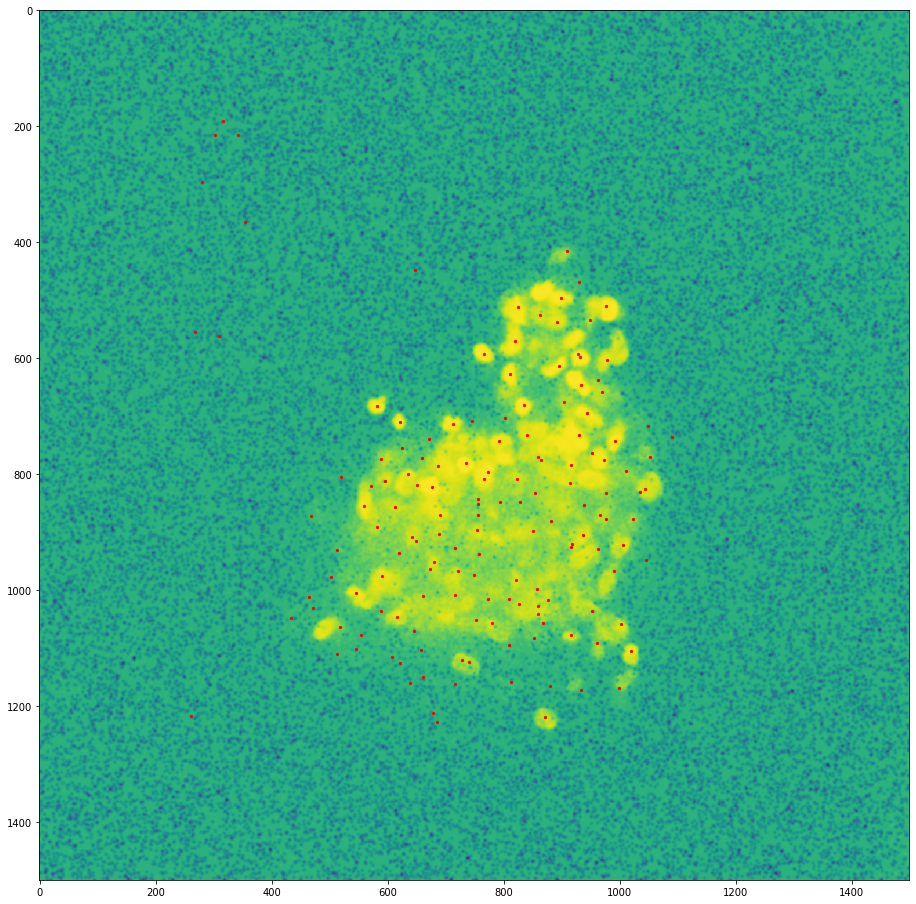

In [76]:
import matplotlib.pyplot as plt
from skimage import exposure
from scipy.ndimage import gaussian_filter

fd = df.loc[df['mass'] > minmass]

fd =fd.loc[((fd['x'] -fd['x'].mean())**2 < 4*fd['x'].std()**2) &
          ((fd['y'] -fd['y'].mean())**2 < 4*fd['y'].std()**2)]

img_eq = exposure.equalize_hist(Sph.NucImage[55,250:1750,250:1750])
im =  gaussian_filter(img_eq, sigma=2)

ax, fig = plt.subplots(figsize = (16,16))
plt.imshow(im)
plt.scatter(fd['x']-250, fd['y']-250, c = 'r', s = 5)

### Processing

The grunt functions are called from process.

Attention: verify the channel order.

In [40]:
path = r'\\atlas.pasteur.fr\Multicell\Gustave\fusionGustave\TIFF BIS'
spheroidFolder = '1'
timeFolder = '19'

In [ ]:
process._sortFiles(path)

In [41]:
process._makeSingleSpheroidClass(path, spheroidFolder, timeFolder, zRatio, rNoyau,
    dCells, pxtoum, channels, minmass)

prep image: 1 folder and time 19
image made, starting nuclei ID
nuclei gotten, make spheroid


OSError: [Errno 28] No space left on device